# Business Questions

**`Q1:`** What is the ratio between males and females in our company?<br>

**`Q2:`** What is the ratio between Senior Citizens and others in our company?<br>

**`Q3:`** What is the ratio between who has partners and not in our company?<br>

**`Q4:`** What is the ratio between who has dependents and not in our company?<br>

**`Q5:`** What is the ratio between who has MultipleLines and not in our company?<br>

**`Q6:`** Depending on the correlation matrix, which variables have a strong relationship with each other?<br>

**`Q7:`** From the previous question,What is the relationship between the Internet Services and the churn rate?<br>

**`Q8:`** How many Internet Services we provide in our company? - list names and ratio please -<br>

**`Q9:`** What is our Contract types we provide? - names and ratio please-<br>

**`Q10:`** How many customers uses StreamingTV ?<br>

**`Q11:`** What is the ratio between users who streaming movies to StreamingTV subscribers?<br>

**`Q12:`** Is there a strong relationship between the monthly recharge rate and the dependents?<br>

**`Q13:`** Who is the the most important customer in the company according to Monthly and Total charges?<br>

**`Q14:`** How many payment methods we provide? and what is the ratio between each others?<br>

**`Q15:`** What is our churn rate?<br>

**`Q16:`** What is the average monthly charge?<br>

**`Q17:`** From the correlation matrix ,What is the relationship between the Senior Citizens and the monthly charging rate?

**`Q18:`** We want to give offers according to the monthly charge categories, can you explain that?<br>

**`Q19:`** We want to present offers by gender and the Senior Citizen, could you explain that?<br>

# Cleaning The Data

In [277]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [278]:
df = pd.read_csv('customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [279]:
df.duplicated().sum()

0

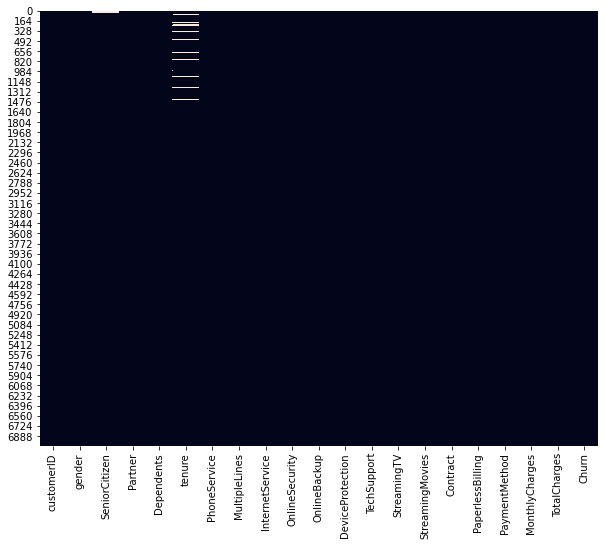

In [280]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cbar = False)
plt.show()

In [281]:
print('Percentage of rows cointaing NaN values:', round((df.isnull().sum().sum() / df.shape[0])*100, 2), '%')

Percentage of rows cointaing NaN values: 2.7 %


- Since the rows with NaN values is very low, the rows with NaN values will be dropped.

In [282]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6857 entries, 0 to 6856
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             6857 non-null   int64  
 1   customerID        6857 non-null   object 
 2   gender            6857 non-null   object 
 3   SeniorCitizen     6857 non-null   float64
 4   Partner           6857 non-null   object 
 5   Dependents        6857 non-null   object 
 6   tenure            6857 non-null   float64
 7   PhoneService      6857 non-null   object 
 8   MultipleLines     6857 non-null   object 
 9   InternetService   6857 non-null   object 
 10  OnlineSecurity    6857 non-null   object 
 11  OnlineBackup      6857 non-null   object 
 12  DeviceProtection  6857 non-null   object 
 13  TechSupport       6857 non-null   object 
 14  StreamingTV       6857 non-null   object 
 15  StreamingMovies   6857 non-null   object 
 16  Contract          6857 non-null   object 


# Answering The Business Questions (EDA)

**`Q1:`** What is the ratio between males and females in our company?<br>

Male Ratio: 50.3 %
Female Ratio: 49.7 %


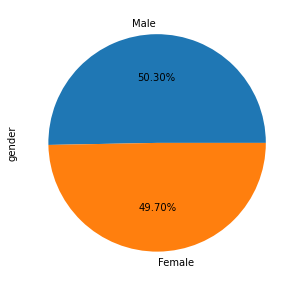

In [284]:
m = round((df.gender.value_counts()['Male'] / df.shape[0])*100, 2)
f = round((df.gender.value_counts()['Female'] / df.shape[0])*100, 2)
print('Male Ratio:', m, '%')
print('Female Ratio:', f, '%')
round(df.gender.value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%1.2f%%', figsize=(5,5));

**`Q2:`** What is the ratio between Senior Citizens and others in our company?<br>

Senior Citizens Ratio: 16.41 %
Not Senior Citizens Ratio: 83.59 %


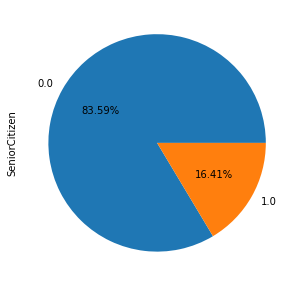

In [285]:
senior = round((df.SeniorCitizen.value_counts()[1.0] / df.shape[0])*100, 2)
not_senior = round((df.SeniorCitizen.value_counts()[0.0] / df.shape[0])*100, 2)
print('Senior Citizens Ratio:', senior, '%')
print('Not Senior Citizens Ratio:', not_senior, '%')
round(df.SeniorCitizen.value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%1.2f%%', figsize=(5,5));

**`Q3:`** What is the ratio between who has partners and not in our company?<br>

Customers with Partner Ratio: 48.96 %
Customers without Partner Ratio: 51.04 %


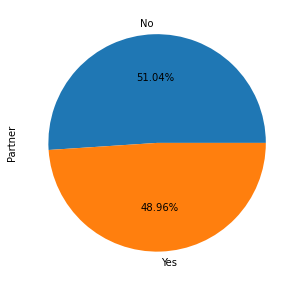

In [286]:
partner = round((df.Partner.value_counts()['Yes'] / df.shape[0])*100, 2)
no_partner = round((df.Partner.value_counts()['No'] / df.shape[0])*100, 2)
print('Customers with Partner Ratio:', partner, '%')
print('Customers without Partner Ratio:', no_partner, '%')
round(df.Partner.value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%1.2f%%', figsize=(5,5));

**`Q4:`** What is the ratio between who has dependents and not in our company?<br>

Customers with Dependents Ratio: 30.06 %
Customers without Dependents Ratio: 69.94 %


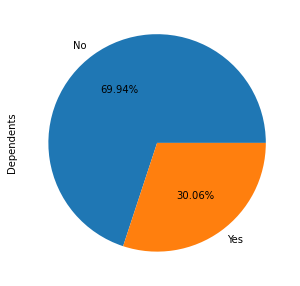

In [287]:
dependents = round((df.Dependents.value_counts()['Yes'] / df.shape[0])*100, 2)
no_dependents = round((df.Dependents.value_counts()['No'] / df.shape[0])*100, 2)
print('Customers with Dependents Ratio:', dependents, '%')
print('Customers without Dependents Ratio:', no_dependents, '%')
round(df.Dependents.value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%1.2f%%', figsize=(5,5));

**`Q5:`** What is the ratio between who has MultipleLines and not in our company?<br>

In [288]:
multiple = round((df.MultipleLines.value_counts()['Yes'] / df.shape[0])*100, 2)
no_multiple = round((df.MultipleLines.value_counts()['No'] / df.shape[0])*100, 2)
no_multiple += round((df.MultipleLines.value_counts()['No phone service'] / df.shape[0])*100, 2)
print('Customers with Multiple Lines Ratio:', multiple, '%')
print('Customers with One Line Ratio:', no_multiple, '%')

Customers with Multiple Lines Ratio: 42.72 %
Customers with One Line Ratio: 57.28 %


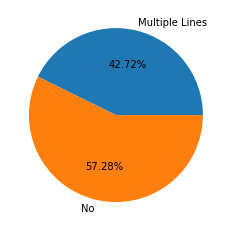

In [289]:
x = [multiple, no_multiple]
label= ['Multiple Lines', 'No']
fig, ax = plt.subplots()
ax.pie(x, labels=label, autopct= '%1.2f%%')
plt.show()

**`Q6:`** Depending on the correlation matrix, which variables have a strong relationship with each other?<br>

In [290]:
df_2 = df.drop(['customerID', 'Contract', 'PaymentMethod'], axis = 1)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6857 entries, 0 to 6856
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             6857 non-null   int64  
 1   gender            6857 non-null   object 
 2   SeniorCitizen     6857 non-null   float64
 3   Partner           6857 non-null   object 
 4   Dependents        6857 non-null   object 
 5   tenure            6857 non-null   float64
 6   PhoneService      6857 non-null   object 
 7   MultipleLines     6857 non-null   object 
 8   InternetService   6857 non-null   object 
 9   OnlineSecurity    6857 non-null   object 
 10  OnlineBackup      6857 non-null   object 
 11  DeviceProtection  6857 non-null   object 
 12  TechSupport       6857 non-null   object 
 13  StreamingTV       6857 non-null   object 
 14  StreamingMovies   6857 non-null   object 
 15  PaperlessBilling  6857 non-null   object 
 16  MonthlyCharges    6857 non-null   float64


In [291]:
df_2.replace('Yes',1, inplace= True)
df_2.replace('No',0, inplace= True)
df_2.replace('Male',0, inplace= True)
df_2.replace('Female',1, inplace= True)
df_2.replace('No phone service',0, inplace= True)
df_2.replace('No internet service',0, inplace= True)
df_2.replace('DSL',1, inplace= True)
df_2.replace('Fiber optic',2, inplace= True)

In [292]:
df_2.head(3)

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,30,1,1.0,1,0,71.0,1,1,2,1,1,1,1,0,0,1,96.35,6766.95,0
1,31,0,1.0,1,0,2.0,1,0,2,0,0,1,0,1,1,1,95.50,181.65,0
2,47,1,0.0,0,0,2.0,1,0,2,0,0,0,0,1,0,1,80.65,144.15,1


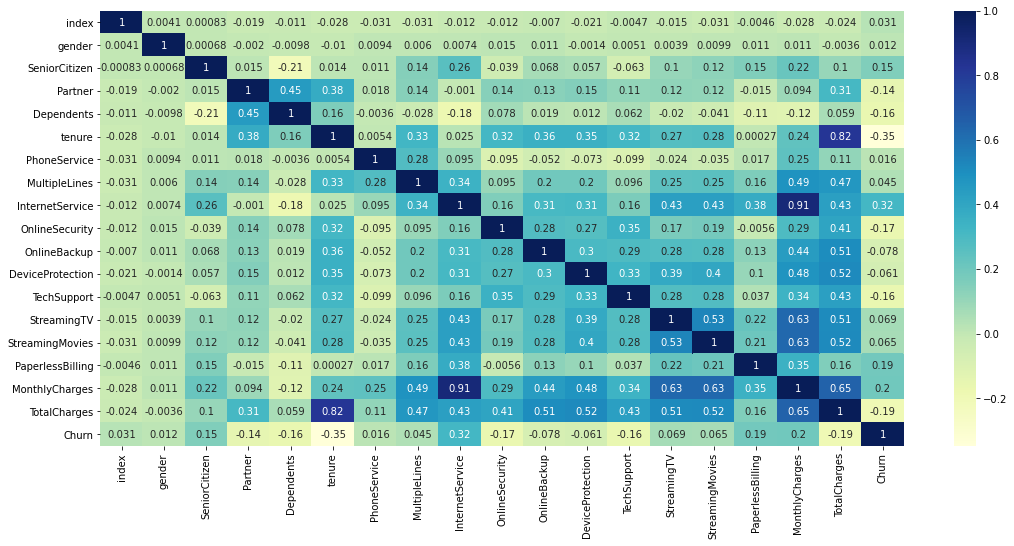

In [293]:
plt.figure(figsize=(18,8))
sns.heatmap(df_2.corr(),cbar = True, annot =True, cmap="YlGnBu");

#### The variables with strong correlation:
**`1.`** Monthly Charges **&** Internet Service.<br>
**`2.`** Total Charges **&** Tenure.<br>
**`3.`** Monthly Charges **&** Total Service.<br>
**`4.`** Streaming Movies **&** Streaming TV.<br>
**`5.`** Monthly Charges and Monthly Charges **&** Streaming Movies.<br>
**`6.`** Monthly Charges and Monthly Charges **&** Streaming TV.<br>
**`7.`** Total Charges and Monthly Charges **&** Online Backup.<br>
**`8.`** Total Charges and Monthly Charges **&** Device Protection.<br>
**`9.`** Total Charges and Monthly Charges **&** Multiple Lines.<br>
**`10.`** Internet Service **&** Churn.<br>

**`Q7:`** From the previous question,What is the relationship between the Internet Services and the churn rate?<br>

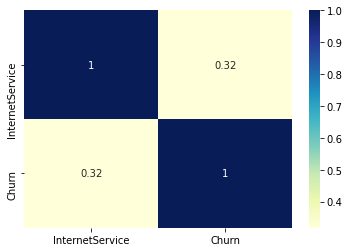

In [294]:
sns.heatmap(df_2[['InternetService', 'Churn']].corr(),cbar = True, annot =True, cmap="YlGnBu");

**`Q8:`** How many Internet Services we provide in our company? - list names and ratio please -<br>

Fiber optic 
--- Ratio: 44.26 %

DSL 
--- Ratio: 34.23 %

No 
--- Ratio: 21.51 %



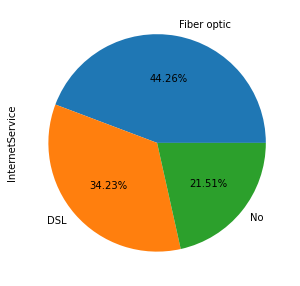

In [295]:
_list = df.InternetService.unique()
for i in range(len(_list)):
    print(_list[i], '\n--- Ratio:', round(df.InternetService.value_counts()[i]/df.shape[0] *100, 2), '%\n')

round(df.InternetService.value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%1.2f%%', figsize=(5,5));

**`Q9:`** What is our Contract types we provide? - names and ratio please-<br>

Two year 
--- Ratio: 54.27 %

Month-to-month 
--- Ratio: 24.46 %

One year 
--- Ratio: 21.28 %



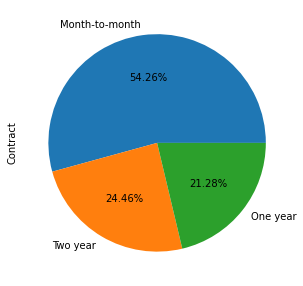

In [296]:
_list = df.Contract.unique()
for i in range(len(_list)):
    print(_list[i], '\n--- Ratio:', round(df.Contract.value_counts()[i]/df.shape[0] *100, 2), '%\n')

round(df.Contract.value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%1.2f%%', figsize=(5,5));

**`Q10:`** How many customers uses StreamingTV ?<br>

In [297]:
print('No. Customers using StreamingTV:', df.StreamingTV.value_counts()['Yes'])

No. Customers using StreamingTV: 2669


**`Q11:`** What is the ratio between users who streaming movies to StreamingTV subscribers?<br>

In [298]:
movies = round((df.StreamingMovies.value_counts()['Yes'] / df.shape[0])*100, 2)
tv = round((df.StreamingTV.value_counts()['Yes'] / df.shape[0])*100, 2)
print('Customers Streaming Movies Ratio:', movies, '%')
print('Customers Streaming TV Ratio:', tv, '%')

Customers Streaming Movies Ratio: 39.36 %
Customers Streaming TV Ratio: 38.92 %


**`Q12:`** Is there a strong relationship between the monthly recharge rate and the dependents?<br>

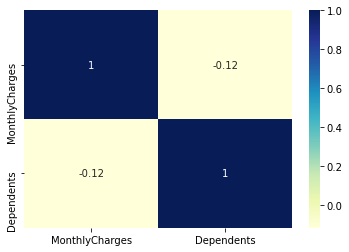

In [299]:
sns.heatmap(df_2[['MonthlyCharges', 'Dependents']].corr(),cbar = True, annot =True, cmap="YlGnBu");

- **No there is not a strong relationship between them.**

**`Q13:`** Who is the the most important customer in the company according to Monthly and Total charges?<br>

In [300]:
# According To Monthly Charges
df.iloc[df.MonthlyCharges.idxmax()]

index                                    4586
customerID                         7569-NMZYQ
gender                                 Female
SeniorCitizen                             0.0
Partner                                   Yes
Dependents                                Yes
tenure                                   72.0
PhoneService                              Yes
MultipleLines                             Yes
InternetService                   Fiber optic
OnlineSecurity                            Yes
OnlineBackup                              Yes
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                           Yes
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                         118.75
TotalCharges                          8672.45
Churn                             

In [301]:
# According To Total Charges
df.iloc[df.TotalCharges.idxmax()]

index                                    4610
customerID                         2889-FPWRM
gender                                   Male
SeniorCitizen                             0.0
Partner                                   Yes
Dependents                                 No
tenure                                   72.0
PhoneService                              Yes
MultipleLines                             Yes
InternetService                   Fiber optic
OnlineSecurity                            Yes
OnlineBackup                              Yes
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                           Yes
Contract                             One year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          117.8
TotalCharges                           8684.8
Churn                             

- **Both customers with IDs (2889-FPWRM) & (7569-NMZYQ) are the most important customers since there monthly and total charges are nearly the same.**

**`Q14:`** How many payment methods we provide? and what is the ratio between each others?<br>

Credit card (automatic) 
--- Ratio: 33.43 %

Electronic check 
--- Ratio: 22.37 %

Bank transfer (automatic) 
--- Ratio: 22.24 %

Mailed check 
--- Ratio: 21.96 %



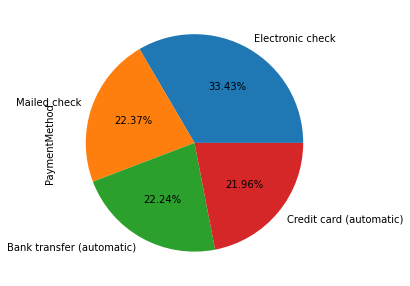

In [302]:
_list = df.PaymentMethod.unique()
for i in range(len(_list)):
    print(_list[i], '\n--- Ratio:', round(df.PaymentMethod.value_counts()[i]/df.shape[0] *100, 2), '%\n')

round(df.PaymentMethod.value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%1.2f%%', figsize=(5,5));

**`Q15:`** What is our churn rate?<br>

The Churn Rate of Telecom Company: 25.93 %


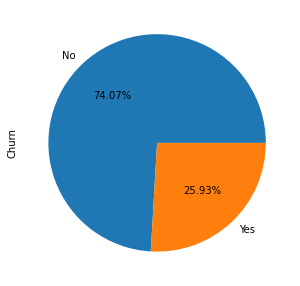

In [303]:
churn_rate  = round((df.query('Churn == "Yes"').shape[0] / df.shape[0])*100, 2)
print('The Churn Rate of Telecom Company:', churn_rate, '%')
round(df.Churn.value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%1.2f%%', figsize=(5,5));

**`Q16:`** What is the average monthly charge?<br>

In [304]:
print('Monthly Charges Average:', round(df.MonthlyCharges.mean(), 2), '%')

Monthly Charges Average: 65.1 %


**`Q17:`** From the correlation matrix ,What is the relationship between the Senior Citizens and the monthly charging rate?

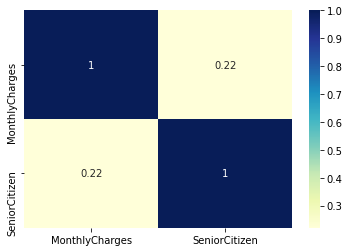

In [305]:
sns.heatmap(df_2[['MonthlyCharges', 'SeniorCitizen']].corr(),cbar = True, annot =True, cmap="YlGnBu");

**`Q18:`** We want to give offers according to the monthly charge categories, can you explain that?<br>

In [306]:
df.MonthlyCharges.describe()

count    6857.000000
mean       65.104754
std        30.096386
min        18.250000
25%        36.000000
50%        70.550000
75%        90.050000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [307]:
bins = [18,40,80,100,120]
label =['Low_Charges', 'Medium_Charges', 'High_Charges', 'Extreme_Charges']
df['MChargesOffer']=pd.cut(df['MonthlyCharges'], bins=bins ,labels= label) 

- **All the customers have been classified by their monthly charges to 4 classes:**<br>
    `1.` Low Charges (Less than 40)<br>
    `2.` Medium Charges (Between 40 and 79)<br>
    `3.` High Charges (Between 80 and 99)<br>
    `4.` Extreme Charges (Greater than 100)<br>

**`Q19:`** We want to present offers by gender and the Senior Citizen, could you explain that?<br>

In [308]:
def Gender_Senior_Offer(row):
    if row['gender']== 'Male' and row['SeniorCitizen']== 1:
        return "Senior Male"
    elif row['gender']== 'Male' and row['SeniorCitizen']== 0:
        return "Junior Male"
    elif row['gender']== 'Female' and row['SeniorCitizen']== 0:
        return "Senior Female"
    elif row['gender']== 'Female' and row['SeniorCitizen']== 1:
        return "Junior Female"
    else:
        return "Other"

In [309]:
df["Gender_Senior_Offer"]= df.apply(Gender_Senior_Offer , axis=1)

- **All the customers have been classified by their gender and whether they are senior or junior to 4 classes:**<br>
    `1.` Senior Male<br>
    `2.` Junior Male<br>
    `3.` Senior Female<br>
    `4.` Junior Female<br>